In [1]:
#libraries Used 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from sklearn import preprocessing 
from pandas.plotting import parallel_coordinates
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer           #to replace unknown with column most_frequent value
from sklearn.svm import SVC

In [2]:
df = pd.read_csv("bank-additional.csv", delimiter=';')                    #load dataset
df = df.rename(index=str, columns={"emp.var.rate": "var", "cons.price.idx": "price","cons.conf.idx": "conf","nr.employed": "employees"})
feature = list(df)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,var,price,conf,euribor3m,employees,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [3]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

#### Here we are replacing unknowns with most frequent values in the column 

In [4]:
imp_mean = SimpleImputer(missing_values="unknown", strategy='most_frequent')     #replacing unknown values with most frequent values
imp_mean.fit(df.values)

mat = imp_mean.transform(df.values)

In [5]:
arr = pd.DataFrame(mat)
arr.columns =  feature[:]
arr.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,var,price,conf,euribor3m,employees,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,0
3,38,services,married,basic.9y,no,yes,no,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.2,-42,4.191,5195.8,0


#### Converting categorical data to numeric data using pandas.ge_dummies which creates a binary column for each of the category. 

In [6]:
arr = pd.get_dummies(arr, columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])

In [7]:
arr.head(5)

,age,duration,campaign,pdays,previous,var,price,conf,euribor3m,employees,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
1,39,346,4,999,0,1.1,93.994,-36.4,4.855,5191,...,0,0,1,0,0,0,0,0,1,0
2,25,227,1,999,0,1.4,94.465,-41.8,4.962,5228.1,...,0,0,0,0,0,0,1,0,1,0
3,38,17,3,999,0,1.4,94.465,-41.8,4.959,5228.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.2,-42,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0


#### In the plots below we are trying to visualizethe spread of the data, and also to look at density of outliers. 

In [8]:
arr = arr.convert_objects(convert_numeric=True)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


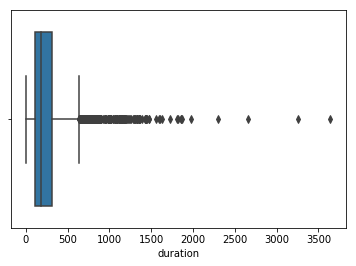

In [9]:
sns.boxplot(x=arr['duration'])

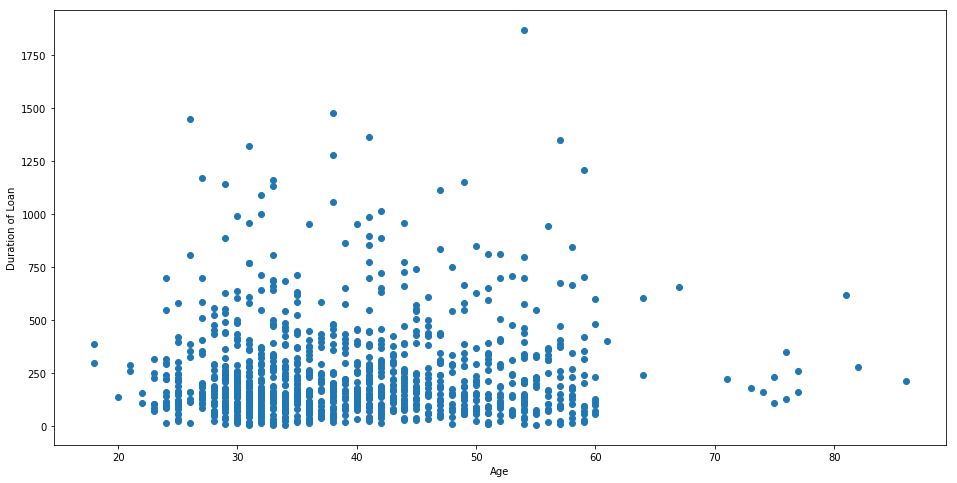

In [10]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(arr['age'][0:1000], arr['duration'][0:1000])
ax.set_xlabel('Age')
ax.set_ylabel('Duration of Loan')
plt.show()

### Performing Z-Score normalization

#### Any z-score greater than 3 or less than -3 is considered to be an outlier. This rule of thumb is based on the empirical rule. From this rule we see that almost all of the data (99.7%) should be within three standard deviations from the mean.

In [11]:
z = np.abs(stats.zscore(arr))
print(z)

[[0.98075178 0.90395178 0.20922829 ... 0.35195808 0.41130767 0.18895848]
 [0.10799146 0.35030022 0.56963417 ... 0.35195808 0.41130767 0.18895848]
 [1.46561862 0.11696598 0.59865952 ... 0.35195808 0.41130767 0.18895848]
 ...
 [1.27167189 0.75700288 0.20922829 ... 2.84124748 2.43127    0.18895848]
 [1.73450254 1.06494265 0.59865952 ... 0.35195808 0.41130767 0.18895848]
 [0.59285831 0.32114953 0.59865952 ... 0.35195808 0.41130767 0.18895848]]


In [12]:
clean_df_o = arr[(z < 3).all(axis=1)]   #cleaning out outliers
clean_df_o.shape

(2038, 58)

In [13]:
clean_df_o.head(5)        # dataset clean of outliers

,age,duration,campaign,pdays,previous,var,price,conf,euribor3m,employees,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,487,2,999,0,-1.8,92.893,-46.2,1.313,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,47,58,1,999,0,-0.1,93.200,-42.0,4.191,5195.8,...,0,0,0,1,0,0,0,0,1,0
9,35,170,1,999,0,1.1,93.994,-36.4,4.855,5191.0,...,0,0,0,0,1,0,0,0,1,0
12,36,97,2,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0,0,0,0,0,0,1,0,1,0
13,47,211,2,999,0,1.4,94.465,-41.8,4.958,5228.1,...,0,0,0,0,1,0,0,0,1,0


#### Compared to the boxplot on unclean data, below we can observe that the data is spread much more smoothly.

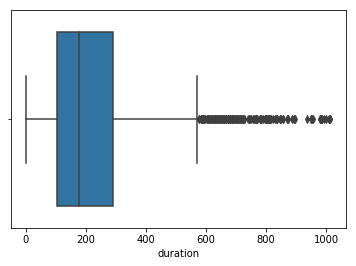

In [14]:
sns.boxplot(x=clean_df_o['duration'])

In [15]:
y = clean_df_o['y']      # seperating out label column into y
clean_df_o = clean_df_o.drop(['y'], axis=1)

### Performing data split: 70/30
#### It's arbitrary. It all depends on how much data you have at hand. It also depends on how much data you expect to be sufficient to accurately train your model. But we compared the accuracy with 80/20 split and we observed higher accuracy with 70/30 split.

In [16]:
x_train, x_test, y_train, y_test = train_test_split(clean_df_o, y, test_size = 0.3, random_state = 0)

In [17]:
x_train.head(5)

,age,duration,campaign,pdays,previous,var,price,conf,euribor3m,employees,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1086,38,103,1,999,0,-2.9,92.963,-40.8,1.099,5076.2,...,0,0,0,0,0,1,0,0,1,0
3827,36,263,1,999,0,1.4,93.444,-36.1,4.964,5228.1,...,0,0,1,0,0,0,0,0,1,0
2994,47,159,1,999,0,-1.8,92.893,-46.2,1.334,5099.1,...,0,0,0,0,0,0,1,0,1,0
3305,32,315,2,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
2765,45,83,3,999,0,1.4,93.918,-42.7,4.963,5228.1,...,0,0,0,0,0,0,1,0,1,0


In [18]:
x_test.head(5)

,age,duration,campaign,pdays,previous,var,price,conf,euribor3m,employees,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
1925,24,582,2,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,0,1,0,0,0,0,0,1,0
399,30,258,2,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,1,0,0
4080,54,351,1,999,0,1.1,93.994,-36.4,4.858,5191.0,...,0,0,0,1,0,0,0,0,1,0
543,47,153,10,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,0,1,0,0,1,0
2541,34,266,4,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,0,1,0,0,0,1,0


### Classification Algo. implementation
### Decision Tree
#### Scikit-learn uses an optimised version of the CART algorithm, CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. CART constructs binary trees using the feature and threshold that yield the largest information gain at each node.

In [19]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(x_train, y_train)
dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred_dt = dt.predict(x_test)

In [21]:
arr = list()
arr.append(accuracy_score(y_test, y_pred_dt))
confusion_matrix(y_test, y_pred_dt)

array([[549,  28],
       [ 21,  14]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred_dt, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       577
           1       0.33      0.40      0.36        35

   micro avg       0.92      0.92      0.92       612
   macro avg       0.65      0.68      0.66       612
weighted avg       0.93      0.92      0.92       612



### Random Forest 

In [23]:
rf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [24]:
rf = rf.fit(x_train, y_train)
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
y_pred_rf = rf.predict(x_test)
arr.append(accuracy_score(y_test, y_pred_rf))
confusion_matrix(y_test, y_pred_rf)

array([[577,   0],
       [ 35,   0]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred_rf, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       577
           1       0.00      0.00      0.00        35

   micro avg       0.94      0.94      0.94       612
   macro avg       0.47      0.50      0.49       612
weighted avg       0.89      0.94      0.92       612



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### MLP 
#### We are implementing MLP using Adam.

In [27]:
mlp_clf = MLPClassifier(activation='relu', solver='adam', alpha=1e-7, hidden_layer_sizes=(5, 2), random_state=1)
mlp_clf = mlp_clf.fit(x_train, y_train)
mlp_clf

C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-07, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [28]:
y_pred_mlp_adam = mlp_clf.predict(x_test)
arr.append(accuracy_score(y_test, y_pred_mlp_adam))
print(accuracy_score(y_test, y_pred_mlp_adam))
confusion_matrix(y_test, y_pred_mlp_adam)

0.9428104575163399


array([[577,   0],
       [ 35,   0]], dtype=int64)

In [29]:
print(classification_report(y_test, y_pred_mlp_adam, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       577
           1       0.00      0.00      0.00        35

   micro avg       0.94      0.94      0.94       612
   macro avg       0.47      0.50      0.49       612
weighted avg       0.89      0.94      0.92       612



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### SVM classifier 

In [30]:
svm = SVC(gamma='auto')
svm = svm.fit(x_train, y_train) 

In [31]:
y_pred_svm = svm.predict(x_test)

arr.append(accuracy_score(y_test, y_pred_svm))
confusion_matrix(y_test, y_pred_svm)

array([[577,   0],
       [ 35,   0]], dtype=int64)

In [32]:
print(classification_report(y_test, y_pred_svm, target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       577
           1       0.00      0.00      0.00        35

   micro avg       0.94      0.94      0.94       612
   macro avg       0.47      0.50      0.49       612
weighted avg       0.89      0.94      0.92       612



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### MLP’s are better with a very large dataset, and especially if the features are very sparse, and can probably handle noise better, but in for our dataset we observe that the performance is similar to SVM and Random Forest

In [33]:
col={'Model':['DT', 'RF', 'MLP_Adam','SVM'], 'Accuracy': arr}
models=['DT', 'RF', 'MLP_Adam','SVM']
table = pd.DataFrame(data=col, index=models)
table

,Model,Accuracy
DT,DT,0.919935
RF,RF,0.942810
MLP_Adam,MLP_Adam,0.942810
SVM,SVM,0.942810


#### From the table above we observe that MLP using Adam gives the highest accuracy of all. Decision tree are the worst performer of all 4 models. For some reason we observe that the accuracies tend to satuarate around ~94.3%, we tried changing the parameters such as solver and acticvation layer but the accuracy didn't get higher than 94.3%.

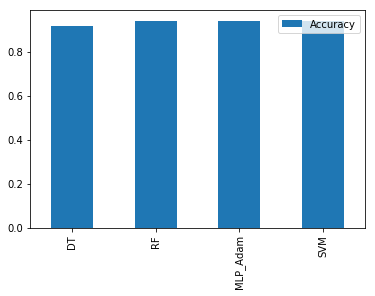

In [34]:
table.plot(kind='bar')

In [35]:
test_data = pd.concat([x_test,y_test], axis=1, sort=False)
test_data.head(5)

,age,duration,campaign,pdays,previous,var,price,conf,euribor3m,employees,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y
1925,24,582,2,999,0,-1.8,92.893,-46.2,1.250,5099.1,...,0,1,0,0,0,0,0,1,0,0
399,30,258,2,999,1,-0.1,93.200,-42.0,4.021,5195.8,...,0,1,0,0,0,0,1,0,0,0
4080,54,351,1,999,0,1.1,93.994,-36.4,4.858,5191.0,...,0,0,1,0,0,0,0,1,0,0
543,47,153,10,999,0,1.4,93.444,-36.1,4.965,5228.1,...,0,0,0,0,1,0,0,1,0,0
2541,34,266,4,999,0,1.4,94.465,-41.8,4.961,5228.1,...,0,0,0,1,0,0,0,1,0,0


#### Below we see 2 scatter plots on test data depicting how the labels are distributed according to the 2 choosen dimensions.
#### We also plot a parallel co-ordinate graph which reflects how the classes vary according the relationship between choosen dimensions.

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


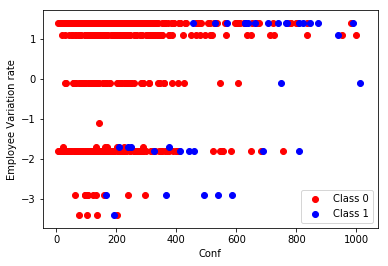

In [36]:
plt.scatter(test_data[y==0]['duration'], test_data[y==0]['var'], label='Class 0', c='red')
plt.scatter(test_data[y==1]['duration'], test_data[y==1]['var'], label='Class 1', c='blue')

# Prettify the graph
plt.legend()
plt.xlabel('Conf')
plt.ylabel('Employee Variation rate')

# display
plt.show()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


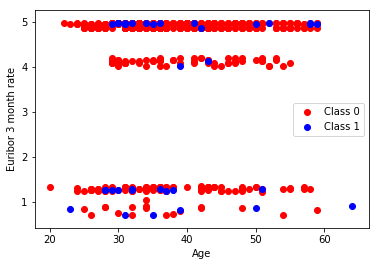

In [37]:
plt.scatter(test_data[y==0]['age'], test_data[y==0]['euribor3m'], label='Class 0', c='red')
plt.scatter(test_data[y==1]['age'], test_data[y==1]['euribor3m'], label='Class 1', c='blue')

# Prettify the graph
plt.legend()
plt.xlabel('Age')
plt.ylabel('Euribor 3 month rate')

# display
plt.show()

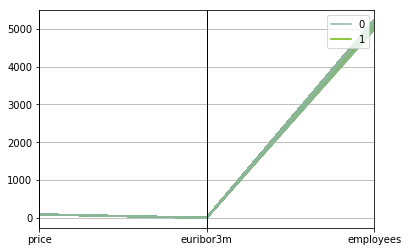

In [38]:
# Select features to include in the plot
plot_feat = ['price', 'euribor3m','employees']

# Concat classes with the normalized data
data_norm = pd.concat([test_data[plot_feat], y], axis=1)

# Perform parallel coordinate plot
parallel_coordinates(data_norm, 'y')
plt.show()

### References:
#### https://scikit-learn.org/stable/modules/tree.html
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.parallel_coordinates.html
#### http://scikit-learn.org/stable/modules/neural_networks_supervised.html
#### https://www.ctspedia.org/do/view/CTSpedia/OutLier
#### http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html